### Figure 2.2(a)

The specification of the covariance function implies a distribution over functions.
$$
k(\mathbf{x}_p,\mathbf{x}_q) = \exp\left(-\frac{|\mathbf{x}_p-\mathbf{x}_q|^2}{2l^2}\right)
$$

In [1]:
import numpy as np

X_test = np.linspace(start=-5, stop=5, num=50)[:,np.newaxis]
X_test.shape

(50, 1)

In [2]:
from sklearn.gaussian_process.kernels import RBF

kernel = RBF(length_scale=1.0, length_scale_bounds="fixed")
K_test = kernel(X_test, X_test)
K_test.shape

(50, 50)

In [3]:
rng = np.random.default_rng(seed=18)
f_test = rng.multivariate_normal(mean=np.zeros(50), cov=K_test, size=3)
f_test.shape

(3, 50)

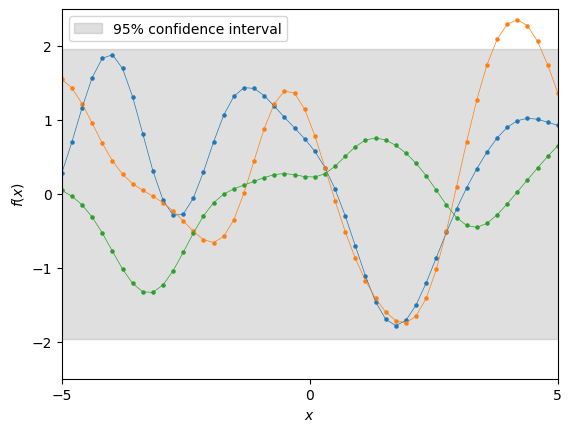

In [4]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
ax.fill_between(
    X_test.squeeze(), -1.96, 1.96,
    color="gray", alpha=0.25, label="95% confidence interval"
)
for f in f_test:
    ax.plot(X_test, f, linewidth=0.5)
    ax.scatter(X_test, f, s=5)
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.set_xticks([-5, 0, 5])
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_xlim(xmin=-5, xmax=5)
ax.set_ylim(ymin=-2.5, ymax=2.5)
_ = ax.legend()

### Figure 2.2(b)

Prediction with noise-free observations.

In [5]:
rng = np.random.default_rng(seed=9)
train_indices = rng.choice(np.arange(50), size=5, replace=False)
X_train = X_test[train_indices]
y_train = rng.normal(size=5)

X_train.shape, y_train.shape

((5, 1), (5,))

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor

gaussian_process = GaussianProcessRegressor(kernel).fit(
    X_train, y_train
)
mean_pred, std_pred = gaussian_process.predict(
    X_test, return_std=True
)
mean_pred.shape, std_pred.shape 

((50,), (50,))

In [7]:
f_sample = gaussian_process.sample_y(X_test, n_samples=3)
f_sample.shape

(50, 3)

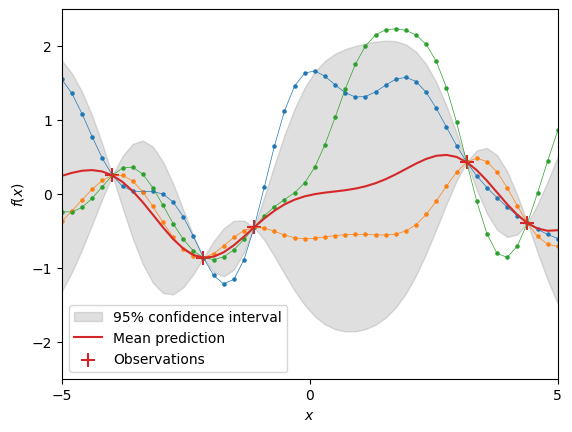

In [8]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
ax.fill_between(
    X_test.squeeze(),
    mean_pred - 1.96 * std_pred,
    mean_pred + 1.96 * std_pred,
    color="gray", alpha=0.25, label="95% confidence interval"
)
for f in f_sample.T:
    ax.plot(X_test, f, linewidth=0.5)
    ax.scatter(X_test, f, s=5)
ax.plot(X_test, mean_pred, label="Mean prediction", color="tab:red")
ax.scatter(X_train, y_train, s=100, marker="+", label="Observations", color="tab:red")
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.set_xticks([-5, 0, 5])
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_xlim(xmin=-5, xmax=5)
ax.set_ylim(ymin=-2.5, ymax=2.5)
_ = ax.legend()

### Figure 2.2(c)

Prediction with noisy observations.

In [9]:
sigma_n = 0.2
y_train_noisy = y_train + rng.normal(loc=0, scale=sigma_n, size=y_train.shape)
y_train_noisy.shape

(5,)

In [10]:
gaussian_process = GaussianProcessRegressor(kernel, alpha=sigma_n**2)
gaussian_process.fit(X_train, y_train_noisy)
mean_pred, std_pred = gaussian_process.predict(
    X_test, return_std=True
)
mean_pred.shape, std_pred.shape 

((50,), (50,))

In [11]:
f_sample = gaussian_process.sample_y(X_test, n_samples=3)
f_sample.shape

(50, 3)

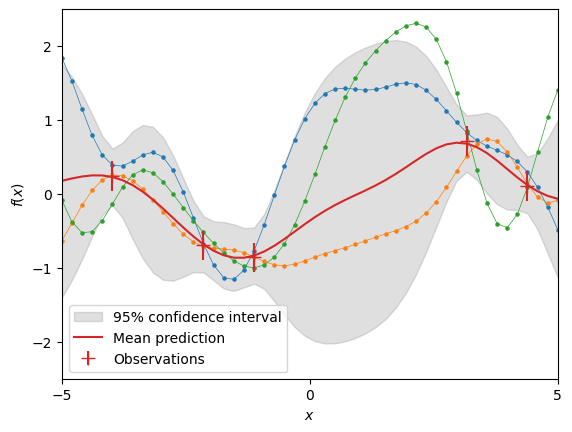

In [12]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
ax.fill_between(
    X_test.squeeze(),
    mean_pred - 1.96 * std_pred,
    mean_pred + 1.96 * std_pred,
    color="gray", alpha=0.25, label="95% confidence interval"
)
for f in f_sample.T:
    ax.plot(X_test, f, linewidth=0.5)
    ax.scatter(X_test, f, s=5)
ax.plot(X_test, mean_pred, label="Mean prediction", color="tab:red")
ax.errorbar(
    X_train, y_train_noisy, sigma_n, label="Observations",
    linestyle="None", color="tab:red",
    marker="+", markersize=10
)
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.set_xticks([-5, 0, 5])
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_xlim(xmin=-5, xmax=5)
ax.set_ylim(ymin=-2.5, ymax=2.5)
_ = ax.legend()